#    Data 620, Project 1
Team 6: Alice Friedman, Jun Pan, Stephen (Scott) Jones, and Jeff Littlejohn
June 19, 2019

## Part 1: Setup

- Install required packages (NetworkX, Matplotlib.pyplot)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import json
from twython import Twython

## Load Data

- Data is scraped from Twitter using Twython and the Twitter API

In [3]:
# Code below adapated from: https://stackabuse.com/accessing-the-twitter-api-with-python/
# Load credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)
    

# Instantiate an object and provide Twitter credentials
twitter = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET_KEY'], creds['ACCESS_TOKEN'], creds['ACCESS_SECRET_TOKEN'])


followers = twitter.get_followers_list(screen_name = "mikegravel") #users that follow @mikegravel
friends = twitter.get_friends_list(screen_name = "mikegravel") #users that @mikegravel follows

In [23]:
dict_ = {'screen_name': [], 'verified': [], 'followers_count': []}  
for user in followers['users']:  
    dict_['screen_name'].append(user['screen_name'])
    dict_['verified'].append(user['verified'])
    dict_['followers_count'].append(user['followers_count'])

#Structure data in a pandas DataFrame for easier manipulation
df_followers = pd.DataFrame(dict_)  
df_followers.sort_values(by='followers_count', inplace=True, ascending=False)  
df_followers.head(5)

# Next need to add a column for the direction of this followership, then add the other followers.
# Then, add a directional edge to each of these friends
# Following step is to get the friends-of-friends, which can be done with a for loop. Something like:
#for friend in df:
#    followers = twitter.get_followers_list(screen_name = friend) 
#   friends = twitter.get_friends_list(screen_name = friend)

screen_name  verified  followers_count
7           GOOESQ     False             1572
4   MadhuriSathish     False              804
15   EphromJosine1     False              384
11        ptown_98     False              285
3          ALawley     False              258

## Data Exploration

Describe data structure and available fields

In [6]:
dict(friends)
dict(followers)

{'users': [{'id': 1110210920289107968,
   'id_str': '1110210920289107968',
   'name': 'Lucas McGee',
   'screen_name': 'LucasMcGee16',
   'location': '',
   'description': '',
   'url': None,
   'entities': {'description': {'urls': []}},
   'protected': False,
   'followers_count': 1,
   'friends_count': 47,
   'listed_count': 0,
   'created_at': 'Mon Mar 25 16:04:44 +0000 2019',
   'favourites_count': 0,
   'utc_offset': None,
   'time_zone': None,
   'geo_enabled': False,
   'verified': False,
   'statuses_count': 0,
   'lang': None,
   'contributors_enabled': False,
   'is_translator': False,
   'is_translation_enabled': False,
   'profile_background_color': 'F5F8FA',
   'profile_background_image_url': None,
   'profile_background_image_url_https': None,
   'profile_background_tile': False,
   'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
   'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default

(array([11.,  1.,  2.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0. ,   78.6,  157.2,  235.8,  314.4,  393. ,  471.6,  550.2,
         628.8,  707.4,  786. ,  864.6,  943.2, 1021.8, 1100.4, 1179. ,
        1257.6, 1336.2, 1414.8, 1493.4, 1572. ]),
 <a list of 20 Patch objects>)

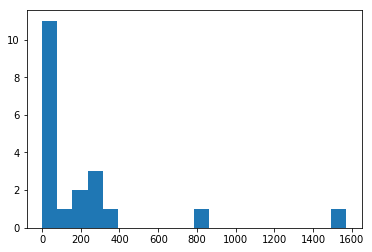

In [28]:
df_followers.head()
plt.hist(df_followers['followers_count'], bins=20)

## Create Graph

To create a social network graph of users with a directed "follow" relationship to official campaign Twitter of Deval Patrick, who ran for office in 2010

- Add "ego" to graph by locating Twitter user Mike Gravel
- Add edges based on users who follow @mikegravel
    - Include as metadata verified status, or other categorical data
- Create list of TwitterIDs for depth=1
- Add depth=2 edges of users who follow users identified in list above


In [14]:
g = nx.Graph()
g.clear()
g.add_node('mikegravel')

In [34]:
for i in len(df_followers):
    g.add_edge(df_followers['screen_name'][i], 'mikegravel')

TypeError: 'int' object is not iterable

GOOESQ


In [37]:
#Needs some kind of loop like this, but this doesn't work
for screen_name in friends[]:
    g.add_edge('mikegravel', ['screen_name'])

TypeError: unhashable type: 'list'

## Plot Initial Graph Structure

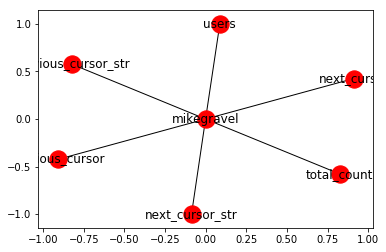

In [12]:
nx.draw_networkx(g)

## Subset Graph

Use core or island methods described in text book to identify communities

## Plot Subsetted Graph

## Analyze Graph

- Graph Diameter
- Avegage centrality measures (betweenness, degree, pagerank)
    - Plot centrality measures?

Then, calculate each of these measures by verified status --> create dataframe

## Conclusions, Discussion

## References

Data source: [Stanford University Twitter Follower Network, 2010](https://snap.stanford.edu/data/twitter-2010.html)
Twitter API access code adapted from: [Stack Abuse](https://stackabuse.com/accessing-the-twitter-api-with-python/)